<a href="https://colab.research.google.com/github/chloevan/python_visualisation/blob/master/matplotlib_01_linegraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
title: "matplotlib_01_linegraph"
date: 2020-04-17T11:15:47+09:00
tags:
  - "Data Visualisation"
  - "Python"
  - "line grpah"
  - "Matplotlib"
  - "선 그래프"
categories:
  - "Data Visualisation"
  - "Python"
  - "line grpah"
  - "Matplotlib"
  - "선 그래프"
menu: 
  python:
    name: matplotlib_01_linegraph
---

## 공지

제 수업을 듣는 사람들이 계속적으로 실습할 수 있도록 강의 파일을 만들었습니다. 늘 도움이 되기를 바라며. 참고했던 교재 및 Reference는 꼭 확인하셔서 교재 구매 또는 관련 Reference를 확인하시기를 바랍니다. 

도움이 되었다면 `Github`에 `Star`를 눌러주세요.
- [python_visualisation](https://github.com/chloevan/python_visualisation)

## I. Matplotlib 기본 그래프

Matplotlib는 파이썬 표준 시각화 도구라고 불리워지며 파이썬 그래프의 기본 토대가 된다고 해도 무방하다. 객체지향 프로그래밍을 지원하므로 세세하게 꾸밀 수 있다. 

## II. matplotlib 설치

설치방법은 윈도우 명령 프롬프트, MacOS, Linux 터미널에서 `pip install matplotlib`입력하면 되지만, 간혹 여러 환경에 따라 달라질 수 있으니 관련 싸이트에서 확인하기를 바란다. 
- 설치 방법: https://matplotlib.org/users/installing.html

## III. 선 그래프(line plot)

시계열 데이터와 같이 연속적인 값의 변화와 패턴을 파악하는데 적합하다. 그래프를 그리기 위해 2020년 전세계를 강타했던 코로나 데이터셋을 위주로 그래프를 그려보도록 한다. 

### (1) 전체 소스코드

코로나 데이터셋을 기반으로 데이터 수집부터 시각화까지 전체 소스코드를 보여준 뒤, 다시 설명하도록 한다. 

In [21]:
# 모듈 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# Excel 데이터 데이터프레임으로 변환
covid_19 = pd.read_excel("data/20200406-COVID-19-geographic-disbtribution-worldwide.xlsx")

# KOR 데이터만 추출, val. countryterritoryCode
covid_kor = covid_19[covid_19['countryterritoryCode'] == 'KOR']
covid_kor.set_index('dateRep', inplace=True)

plt.style.use('bmh')

plt.plot(covid_kor.index, covid_kor.cases)
plt.title('Corona Time Series in S.Korea')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.legend(labels=['Cases'], loc='best')
plt.show()

### (2) 코드 설명

데이터 분석의 `Workflow`는 대개 다음과 같이 진행한다. 분석관련 모듈 설치, 데이터 수집, 데이터 가공, 그리고 데이터 시각화 순서로 진행이 된다. 

- (1) 분석관련 모듈 설치

In [22]:
# 모듈 불러오기
import pandas as pd
import matplotlib.pyplot as plt

`pandas`는 데이터 수집 및 가공에 특화된 모듈이다. `matplotlib.pyplot` 모듈을 `as plt`와 같이 약칭 `plt`로 `import`한다. 

- (2) 엑셀파일을 판다스를 활용하여 데이터프레임 변환

In [31]:
covid_19 = pd.read_excel("data/20200406-COVID-19-geographic-disbtribution-worldwide.xlsx")

엑셀파일을 불러오는 과정에 대한 전반적인 설명은 강사가 작성한 자료를 참고한다. [Pandas With Excel](https://chloevan.github.io/python/pandas/pandas_with_excel/)

- 데이터 가공

In [32]:
# KOR 데이터만 추출, val. countryterritoryCode
covid_kor = covid_19[covid_19['countryterritoryCode'] == 'KOR']
covid_kor.set_index('dateRep', inplace=True)

위 소스코드에 대한 설명은 조금 필요하다. 선 그래프를 그리기 위해 필요한 변수는 `country` & `cases` 두개의 변수만 필요하다. 그런데, 여기에서 `filter`를 진행한다. 

In [33]:
print(covid_19.head())

     dateRep  day  month  year  cases  deaths countriesAndTerritories geoId  \
0 2020-04-05    5      4  2020     35       1             Afghanistan    AF   
1 2020-04-04    4      4  2020      0       0             Afghanistan    AF   
2 2020-04-03    3      4  2020     43       0             Afghanistan    AF   
3 2020-04-02    2      4  2020     26       0             Afghanistan    AF   
4 2020-04-01    1      4  2020     25       0             Afghanistan    AF   

  countryterritoryCode  popData2018  
0                  AFG   37172386.0  
1                  AFG   37172386.0  
2                  AFG   37172386.0  
3                  AFG   37172386.0  
4                  AFG   37172386.0  


위 데이터를 보면, `countryterritoryCode`별로 날짜별로 데이터가 집계중인 것을 알 수 있다. 이 데이터에서 필요한 정보를 담은 데이터만 가져오는 것이 주요 핵심이다. 아래 코드가 `countryterritoryCode`에서 `KOR`에 관련된 행만 가져오는 데이터를 추출한 것이다. 

```python
covid_kor = covid_19[covid_19['countryterritoryCode'] == 'KOR']
```

두번째로 봐야 하는 것은 `set_index('dateRep', inplace=True)`라는 코드는 간단하게 표현하면, 데이터를 업데이트 하는데, `dateRep`열을 기준으로 0부터 재정렬한다는 뜻이다. 

- 데이터 시각화
시각화는 다양한 스타일이 존재하기 마련이다. matplotlib에서도 다양한 스타일이 존재한다. 스타일 리스트를 출력해보자. 

In [34]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


위와 같이 다양한 스타일이 존재한다. 여기에서 마음에 드는 것 선택해서 입력하면 된다. 스타일이 어떻게 적용되는지 상세한 정보가 필요하다면 다음의 링크를 참조한다. [Style_Sheet](https://matplotlib.org/examples/style_sheets/style_sheets_reference.html)

In [36]:
plt.style.use('bmh')

선 그래프를 그리는 `plot()` 함수에 입력할 `x, y`축 데이터를 선택한다. 

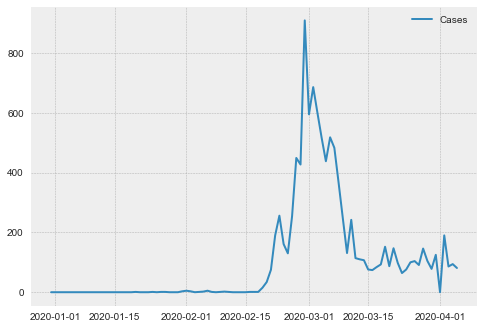

In [39]:
plt.plot(covid_kor.index, covid_kor.cases)
plt.legend(labels=['Cases'], loc='best')

위와 같이 그래프가 출력이 되었다면, 그 다음부터는 그래프를 꾸미는 것이다. 차트의 제목, x축 이름, y축 이름 함수를 활용하여 그래프를 완성한다. 

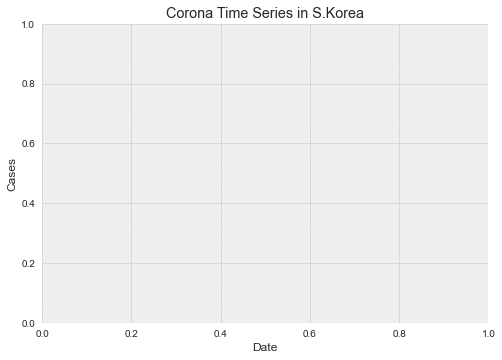

In [38]:
plt.title('Corona Time Series in S.Korea')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.show()

## Reference

“Usage Guide¶.” Usage Guide - Matplotlib 3.2.1 Documentation, matplotlib.org/tutorials/introductory/usage.html.